## **1. 📦 Core Indicator Themes & Timing**

| Theme               | Indicator                                      | Timing     |
|---------------------|---------------------------------------------------------------------|------------|
| **Confidence**       | Consumer Confidence                            | Leading    |
|                     | Business Confidence                            | Leading    |
| **Labor Market**     | Total Jobs                                     | Coincident |
|                     | Unemployment Rate                              | Lagging    |
|                     | Labor Force Participation                      | Coincident |
| **Inflation**        | Consumer Price Index (CPI)                     | Lagging    |
|                     | Producer Price Index (PPI)                     | Leading    |
|                     | Crude Oil Prices                                | Leading    |
| **Interest Rates**   | Fed Funds Rate                                 | Lagging    |
|                     | Baa-Aaa Treasury Constant Maturity Rate        | Mixed      |
| **Real Economy**     | Housing Starts                                 | Leading    |
|                     | Durable Goods Orders                           | Leading    |
|                     | Capacity Utilization                           | Coincident |
| **Production**       | Industrial Production                          | Coincident |
| **Fiscal & Credit**  | Deficit as % of GDP                            | Lagging    |
|                     | Baa-Aaa Corporate Bond Yield                   | Lagging    |
|                     | Credit Conditions Subindex                      | Lagging    |
| **Liquidity**        | Real M2 Stocks                                 | Lagging    |
| **Sales/Inventory**  | Business Inventories                           | Lagging    |
|                     | Retail Sales                                   | Coincident |
| **Volatility**       | VIX (Volatility Index)                         | Leading    |

### All our Datasets

In [198]:
import pandas as pd
import sqlite3

# Load CSV files into DataFrames
BCI_df = pd.read_csv('Leading/Business_Confidence_Index.csv')
CCI_df = pd.read_csv('Leading/Consumer_Confidence_Index.csv')
Credit_Conditions_df = pd.read_csv('Leading/Credit_Conditions.csv')
Oil_Prices_df = pd.read_csv('Leading/Crude_Oil_Prices.csv')
Housing_Starts_df = pd.read_csv('Leading/Housing_Starts.csv')
Jobless_Claims_df = pd.read_csv('Leading/Initial_Claims.csv')
Volatility_Index_df = pd.read_csv('Leading/Volatility_Index.csv')


# ---------------------------------------------------
# 🗃️ Load DataFrames into an SQLite in-memory database
# ---------------------------------------------------
conn = sqlite3.connect(':memory:')

BCI_df.to_sql('BusinessConfidence', conn, index=False, if_exists='replace')
CCI_df.to_sql('ConsumerConfidence', conn, index=False, if_exists='replace')
Credit_Conditions_df.to_sql('CreditConditions', conn, index=False, if_exists='replace')
Oil_Prices_df.to_sql('OilPrices', conn, index=False, if_exists='replace')
Housing_Starts_df.to_sql('HousingStarts', conn, index=False, if_exists='replace')
Jobless_Claims_df.to_sql('JoblessClaims', conn, index=False, if_exists='replace')
Volatility_Index_df.to_sql('Volatility', conn, index=False, if_exists='replace')



# ---------------------------
# 📊 SQL Query to Join Tables
# ---------------------------
sql_query = """
SELECT *
FROM JoblessClaims
LEFT JOIN BusinessConfidence ON JoblessClaims.observation_date = BusinessConfidence.observation_date
LEFT JOIN ConsumerConfidence ON JoblessClaims.observation_date = ConsumerConfidence.observation_date
LEFT JOIN CreditConditions ON JoblessClaims.observation_date = CreditConditions.observation_date
LEFT JOIN OilPrices ON JoblessClaims.observation_date = OilPrices.observation_date
LEFT JOIN HousingStarts ON JoblessClaims.observation_date = HousingStarts.observation_date
LEFT JOIN Volatility ON JoblessClaims.observation_date = Volatility.observation_date

WHERE JoblessClaims.observation_date >= '1970-01-01'
"""

# Execute the query and load results into a DataFrame
Leading_Indicators_df = pd.read_sql_query(sql_query, conn)

# Save the merged DataFrame to a new CSV file
csv_filename = "Leading/Leading_Indicators_df.csv"
Leading_Indicators_df.to_csv(csv_filename, index=False)

# Close the connection
conn.close()

# Output the final DataFrame
Leading_Indicators_df

,observation_date,Jobless_Claims,observation_date,Business_Confidence_Index,observation_date,Consumer_Confidence_Index,observation_date,Credit_Conditions_Subindex,observation_date,Crude_Oil_Prices,observation_date,Housing_Starts,observation_date,Volatility_Index
0,1970-01-01,257077,1970-01-01,-2.6,1970-01-01,78.639130,None,NaN,1970-01-01,3.35,1970-01-01,1085,None,NaN
1,1970-04-01,310692,1970-04-01,-10.0,1970-04-01,76.310112,None,NaN,1970-04-01,3.35,1970-04-01,1264,None,NaN
2,1970-07-01,295923,1970-07-01,-1.0,1970-07-01,76.858696,None,NaN,1970-07-01,3.31,1970-07-01,1517,None,NaN
3,1970-10-01,322538,1970-10-01,-15.2,1970-10-01,74.152174,None,NaN,1970-10-01,3.31,1970-10-01,1580,None,NaN
4,1971-01-01,292692,1971-01-01,-4.2,1971-01-01,76.179348,1971-01-01,-1.15617,1971-01-01,3.56,1971-01-01,1828,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,2024-01-01,212154,2024-01-01,-1.8,2024-01-01,79.000000,2024-01-01,-0.01606,2024-01-01,74.15,2024-01-01,1376,2024-01-01,13.71
217,2024-04-01,223615,2024-04-01,-2.4,2024-04-01,77.200000,2024-04-01,-0.04506,2024-04-01,85.35,2024-04-01,1377,2024-04-01,13.98
218,2024-07-01,230769,2024-07-01,-6.0,2024-07-01,66.400000,2024-07-01,-0.03644,2024-07-01,81.80,2024-07-01,1262,2024-07-01,17.07
219,2024-10-01,225462,2024-10-01,-6.2,2024-10-01,70.500000,2024-10-01,-0.08510,2024-10-01,71.99,2024-10-01,1344,2024-10-01,17.36


In [199]:
import pandas as pd
import sqlite3

# Load CSV files into DataFrames
Treasury_Maturity_df = pd.read_csv('Lagging/10Y_2Y_Treasury_Constant_Maturity.csv')
Corporate_Bonds_df = pd.read_csv('Lagging/Baa_Aaa_Corporate_Bond_Yield.csv')
CPI_Inflation_df = pd.read_csv('Lagging/CPI_Inflation_Rate.csv')
Deficit_GDP_df = pd.read_csv('Lagging/Deficit_of_GDP.csv')
Durable_Goods_df = pd.read_csv('Lagging/Durable_Goods.csv')
Interest_Rates_df = pd.read_csv('Lagging/Interest_Rates.csv')
PPI_Inflation_df = pd.read_csv('Lagging/PPI_Inflation_Rate.csv')
Real_GDP_df = pd.read_csv('Lagging/Real_Gross_Domestic_Product.csv')
Real_M2_Stocks_df = pd.read_csv('Lagging/Real_M2_Stocks.csv')
Business_Inventories_df = pd.read_csv('Lagging/Total_Business_Inventories.csv')
Unemployment_Rate_df = pd.read_csv('Lagging/Unemployment_Rate.csv')


# Set up in-memory SQLite connection
conn = sqlite3.connect(':memory:')

# Load data into SQL tables
Treasury_Maturity_df.to_sql('TreasuryMaturity', conn, index=False, if_exists='replace')
Corporate_Bonds_df.to_sql('CorporateYield', conn, index=False, if_exists='replace')
CPI_Inflation_df.to_sql('CPI', conn, index=False, if_exists='replace')
Deficit_GDP_df.to_sql('DeficitGDP', conn, index=False, if_exists='replace')
Durable_Goods_df.to_sql('DurableGoods', conn, index=False, if_exists='replace')
Interest_Rates_df.to_sql('InterestRates', conn, index=False, if_exists='replace')
PPI_Inflation_df.to_sql('PPI', conn, index=False, if_exists='replace')
Real_GDP_df.to_sql('GDP', conn, index=False, if_exists='replace')
Business_Inventories_df.to_sql('Inventories', conn, index=False, if_exists='replace')
Unemployment_Rate_df.to_sql('Unemployment', conn, index=False, if_exists='replace')



# SQL query to join all lagging indicator tables on observation_date
sql_query = """
SELECT *
FROM InterestRates
LEFT JOIN TreasuryMaturity ON InterestRates.observation_date = TreasuryMaturity.observation_date
LEFT JOIN CorporateYield ON InterestRates.observation_date = CorporateYield.observation_date
LEFT JOIN CPI ON InterestRates.observation_date = CPI.observation_date
LEFT JOIN DeficitGDP ON InterestRates.observation_date = DeficitGDP.observation_date
LEFT JOIN DurableGoods ON InterestRates.observation_date = DurableGoods.observation_date
LEFT JOIN GDP ON InterestRates.observation_date = GDP.observation_date
LEFT JOIN PPI ON InterestRates.observation_date = PPI.observation_date
LEFT JOIN Inventories ON InterestRates.observation_date = Inventories.observation_date
LEFT JOIN Unemployment ON InterestRates.observation_date = Unemployment.observation_date

WHERE InterestRates.observation_date >= '1967-01-01'
"""

# Execute query and load result into DataFrame
Lagging_Indicators_df = pd.read_sql_query(sql_query, conn)

# Save to CSV
Lagging_Indicators_df.to_csv("Lagging/Lagging_Indicators_df.csv", index=False)

# Close the database connection
conn.close()

# Display the final joined DataFrame
Lagging_Indicators_df

,observation_date,Interest_Rates,observation_date,10Y_minus_2Y_Treasury_Constant_Maturity,observation_date,Corporate_Bond_Yield,observation_date,CPI,observation_date,Deficit_%_GDP,observation_date,Durable_Good_Orders,observation_date,GDP,observation_date,PPI,observation_date,Business_Inventories,observation_date,Unemployment_Rate
0,1967-01-01,4.82,None,NaN,None,None,1967-01-01,32.900,None,NaN,None,NaN,1967-01-01,4870.299,1967-01-01,33.400,None,NaN,1967-01-01,3.9
1,1967-04-01,3.99,None,NaN,None,None,1967-04-01,33.100,None,NaN,None,NaN,1967-04-01,4873.287,1967-04-01,33.100,None,NaN,1967-04-01,3.8
2,1967-07-01,3.89,None,NaN,None,None,1967-07-01,33.400,None,NaN,None,NaN,1967-07-01,4919.392,1967-07-01,33.500,None,NaN,1967-07-01,3.8
3,1967-10-01,4.17,None,NaN,None,None,1967-10-01,33.700,None,NaN,None,NaN,1967-10-01,4956.477,1967-10-01,33.400,None,NaN,1967-10-01,4.0
4,1968-01-01,4.79,None,NaN,None,None,1968-01-01,34.100,None,NaN,None,NaN,1968-01-01,5057.553,1968-01-01,33.800,None,NaN,1968-01-01,3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,2024-01-01,5.33,2024-01-01,-0.26,None,None,2024-01-01,309.794,2024-01-01,-6.28002,2024-01-01,279500.0,2024-01-01,23053.545,2024-01-01,251.306,2024-01-01,2533439.0,2024-01-01,3.7
229,2024-04-01,5.33,2024-04-01,-0.33,None,None,2024-04-01,313.016,None,NaN,2024-04-01,276422.0,2024-04-01,23223.906,2024-04-01,256.978,2024-04-01,2546223.0,2024-04-01,3.9
230,2024-07-01,5.26,2024-07-01,-0.25,None,None,2024-07-01,313.566,None,NaN,2024-07-01,287427.0,2024-07-01,23400.294,2024-07-01,257.321,2024-07-01,2574892.0,2024-07-01,4.2
231,2024-10-01,4.65,2024-10-01,0.12,None,None,2024-10-01,315.564,None,NaN,2024-10-01,282571.0,2024-10-01,23542.349,2024-10-01,253.081,2024-10-01,2585582.0,2024-10-01,4.1


In [200]:
import pandas as pd
import sqlite3

# Load CSV files into DataFrames
Capacity_df = pd.read_csv('Coincident/Capacity_Utilization_Index.csv')
Industrial_Production_df = pd.read_csv('Coincident/Industrial_Production_Index.csv')
Labor_Force_Participation_df = pd.read_csv('Coincident/Labor_Force_Participation.csv')
Retail_Sales_df = pd.read_csv('Coincident/Retail_Sales.csv')
Total_Jobs_df = pd.read_csv('Coincident/Total_Jobs.csv')


# ---------------------------------------------------
# 🗃️ Load DataFrames into an SQLite in-memory database
# ---------------------------------------------------
conn = sqlite3.connect(':memory:')

Capacity_df.to_sql('Capacity', conn, index=False, if_exists='replace')
Industrial_Production_df.to_sql('IndProd', conn, index=False, if_exists='replace')
Labor_Force_Participation_df.to_sql('LaborForce', conn, index=False, if_exists='replace')
Retail_Sales_df.to_sql('RetailSales', conn, index=False, if_exists='replace')
Total_Jobs_df.to_sql('Jobs', conn, index=False, if_exists='replace')


# ---------------------------
# 📊 SQL Query to Join Tables
# ---------------------------
sql_query = """
SELECT *
FROM Capacity
LEFT JOIN IndProd ON Capacity.observation_date = IndProd.observation_date
LEFT JOIN LaborForce ON Capacity.observation_date = LaborForce.observation_date
LEFT JOIN RetailSales ON Capacity.observation_date = RetailSales.observation_date
LEFT JOIN Jobs ON Capacity.observation_date = Jobs.observation_date 
WHERE Capacity.observation_date >= '1967-01-01'
"""

# Execute the query and load results into a DataFrame
Coincident_Indicators_df = pd.read_sql_query(sql_query, conn)

# Save the merged DataFrame to a new CSV file
csv_filename = "Coincident/Coincident_Indicators_df.csv"
Coincident_Indicators_df.to_csv(csv_filename, index=False)

# Close the connection
conn.close()

# Provide the final DataFrame
Coincident_Indicators_df

,observation_date,Capacity_Utilization_Rate,observation_date,Industrial_Production_Index,observation_date,Labor_Force_Participation,observation_date,Total_Retail_Sales,observation_date,Total_Jobs
0,1967-01-01,88.1496,1967-01-01,35.1638,1967-01-01,59.5,None,NaN,1967-01-01,65407
1,1967-04-01,86.6086,1967-04-01,34.8951,1967-04-01,59.4,None,NaN,1967-04-01,65466
2,1967-07-01,86.0431,1967-07-01,34.5076,1967-07-01,59.6,None,NaN,1967-07-01,65888
3,1967-10-01,87.1866,1967-10-01,35.3976,1967-10-01,59.9,None,NaN,1967-10-01,66225
4,1968-01-01,87.3375,1968-01-01,36.2514,1968-01-01,59.2,None,NaN,1968-01-01,66804
...,...,...,...,...,...,...,...,...,...,...
227,2023-10-01,78.2766,2023-10-01,102.5781,2023-10-01,62.7,2023-10-01,227323.0,2023-10-01,156520
228,2024-01-01,77.7036,2024-01-01,101.4830,2024-01-01,62.5,2024-01-01,224062.0,2024-01-01,157049
229,2024-04-01,77.9731,2024-04-01,102.3568,2024-04-01,62.7,2024-04-01,224487.0,2024-04-01,157635
230,2024-07-01,77.6310,2024-07-01,102.5192,2024-07-01,62.7,2024-07-01,226699.0,2024-07-01,158003


In [201]:
import pandas as pd
import sqlite3

# Load CSV files into DataFrames
Capacity_df = pd.read_csv('Coincident/Capacity_Utilization_Index.csv')
Industrial_Production_df = pd.read_csv('Coincident/Industrial_Production_Index.csv')
Labor_Force_Participation_df = pd.read_csv('Coincident/Labor_Force_Participation.csv')

Total_Jobs_df = pd.read_csv('Coincident/Total_Jobs.csv')


# ---------------------------------------------------
# 🗃️ Load DataFrames into an SQLite in-memory database
# ---------------------------------------------------
conn = sqlite3.connect(':memory:')

Capacity_df.to_sql('Capacity', conn, index=False, if_exists='replace')
Industrial_Production_df.to_sql('IndProd', conn, index=False, if_exists='replace')
Labor_Force_Participation_df.to_sql('LaborForce', conn, index=False, if_exists='replace')
Retail_Sales_df.to_sql('RetailSales', conn, index=False, if_exists='replace')
Total_Jobs_df.to_sql('Jobs', conn, index=False, if_exists='replace')


# ---------------------------
# 📊 SQL Query to Join Tables
# ---------------------------
sql_query = """
SELECT *
FROM Capacity
LEFT JOIN IndProd ON Capacity.observation_date = IndProd.observation_date
LEFT JOIN LaborForce ON Capacity.observation_date = LaborForce.observation_date
LEFT JOIN RetailSales ON Capacity.observation_date = RetailSales.observation_date
LEFT JOIN Jobs ON Capacity.observation_date = Jobs.observation_date 
WHERE Capacity.observation_date >= '1967-01-01'
"""

# Execute the query and load results into a DataFrame
Coincident_Indicators_df = pd.read_sql_query(sql_query, conn)

# Save the merged DataFrame to a new CSV file
csv_filename = "Coincident/Coincident_Indicators_df.csv"
Coincident_Indicators_df.to_csv(csv_filename, index=False)

# Close the connection
conn.close()

# Provide the final DataFrame
Coincident_Indicators_df

,observation_date,Capacity_Utilization_Rate,observation_date,Industrial_Production_Index,observation_date,Labor_Force_Participation,observation_date,Total_Retail_Sales,observation_date,Total_Jobs
0,1967-01-01,88.1496,1967-01-01,35.1638,1967-01-01,59.5,None,NaN,1967-01-01,65407
1,1967-04-01,86.6086,1967-04-01,34.8951,1967-04-01,59.4,None,NaN,1967-04-01,65466
2,1967-07-01,86.0431,1967-07-01,34.5076,1967-07-01,59.6,None,NaN,1967-07-01,65888
3,1967-10-01,87.1866,1967-10-01,35.3976,1967-10-01,59.9,None,NaN,1967-10-01,66225
4,1968-01-01,87.3375,1968-01-01,36.2514,1968-01-01,59.2,None,NaN,1968-01-01,66804
...,...,...,...,...,...,...,...,...,...,...
227,2023-10-01,78.2766,2023-10-01,102.5781,2023-10-01,62.7,2023-10-01,227323.0,2023-10-01,156520
228,2024-01-01,77.7036,2024-01-01,101.4830,2024-01-01,62.5,2024-01-01,224062.0,2024-01-01,157049
229,2024-04-01,77.9731,2024-04-01,102.3568,2024-04-01,62.7,2024-04-01,224487.0,2024-04-01,157635
230,2024-07-01,77.6310,2024-07-01,102.5192,2024-07-01,62.7,2024-07-01,226699.0,2024-07-01,158003


In [202]:
import pandas as pd
import sqlite3

Capacity_Utilization_Growth_Rate_df= pd.read_csv('Coincident/Capacity_Utilization_Index.csv')
Capacity_Utilization_Growth_Rate_df['Capacity_Growth_Rate'] = Capacity_Utilization_Growth_Rate_df['Capacity_Utilization_Rate'].diff().round(2)
Capacity_Utilization_Growth_Rate_df

Total_Jobs_Added_df= pd.read_csv('Coincident/Total_Jobs.csv')
Total_Jobs_Added_df['Jobs_Added'] = Total_Jobs_Added_df['Total_Jobs'].diff()
Total_Jobs_Added_df

Unemployment_Rate_Change_df = pd.read_csv('Lagging/Unemployment_Rate.csv')
Unemployment_Rate_Change_df['Unemployment_Rate_Change'] = Unemployment_Rate_Change_df['Unemployment_Rate'].diff()
Unemployment_Rate_Change_df

Real_GDP_Growth_Rate_df = pd.read_csv('Lagging/Real_Gross_Domestic_Product.csv')
Real_GDP_Growth_Rate_df['GDP_Growth_Rate'] = Real_GDP_Growth_Rate_df['GDP'].pct_change()*100
Real_GDP_Growth_Rate_df

Industrial_Production_Growth_Rate_df = pd.read_csv('Coincident/Industrial_Production_Index.csv')
Industrial_Production_Growth_Rate_df['Industrial_Production_Growth'] = Industrial_Production_Growth_Rate_df['Industrial_Production_Index'].pct_change()*100
Industrial_Production_Growth_Rate_df

Jobless_Claims_Change_df = pd.read_csv('Leading/Initial_Claims.csv')
Jobless_Claims_Change_df['Jobless_Claims_Change'] = Jobless_Claims_Change_df['Jobless_Claims'].diff()
Jobless_Claims_Change_df


# ---------------------------
# 📊 SQL Query to Join Tables
# ---------------------------

conn = sqlite3.connect(':memory:')

Capacity_Utilization_Growth_Rate_df.to_sql('Capacity', conn, index=False, if_exists='replace')
Total_Jobs_Added_df.to_sql('Jobs', conn, index=False, if_exists='replace')
Unemployment_Rate_Change_df.to_sql('Unemployment', conn, index=False, if_exists='replace')
Real_GDP_Growth_Rate_df.to_sql('GDP', conn, index=False, if_exists='replace')
Industrial_Production_Growth_Rate_df.to_sql('IndProd', conn, index=False, if_exists='replace')
Jobless_Claims_Change_df.to_sql('Jobless_Claims', conn, index=False, if_exists='replace')



sql_query = """
SELECT GDP.observation_date, GDP_Growth_Rate, Unemployment_Rate_Change, Jobs_Added, Capacity_Growth_Rate, Industrial_Production_Growth, Jobless_Claims_Change
FROM GDP
LEFT JOIN Unemployment ON GDP.observation_date = Unemployment.observation_date
LEFT JOIN Jobs ON GDP.observation_date = Jobs.observation_date
LEFT JOIN Capacity ON GDP.observation_date = Capacity.observation_date
LEFT JOIN IndProd ON GDP.observation_date = IndProd.observation_date
LEFT JOIN Jobless_Claims ON GDP.observation_date = Jobless_Claims.observation_date
WHERE GDP.observation_date >= '1970-01-01'
"""

# Execute the query and load results into a DataFrame
Prediction_Indicators_df = pd.read_sql_query(sql_query, conn)

# Save the merged DataFrame to a new CSV file
csv_filename = "Prediction_Indicators.csv"
Prediction_Indicators_df.to_csv(csv_filename, index=False)

# Close the connection
conn.close()

# Provide the final DataFrame
Prediction_Indicators_df

,observation_date,GDP_Growth_Rate,Unemployment_Rate_Change,Jobs_Added,Capacity_Growth_Rate,Industrial_Production_Growth,Jobless_Claims_Change
0,1970-01-01,-0.148892,0.4,-65.0,-2.92,-1.851756,49308.0
1,1970-04-01,0.141718,0.2,-103.0,-1.23,-0.257036,53615.0
2,1970-07-01,0.921467,0.1,24.0,-1.05,0.245536,-14769.0
3,1970-10-01,-1.071573,0.1,-423.0,-2.48,-2.000423,26615.0
4,1971-01-01,2.716149,-0.2,73.0,0.85,0.769402,-29846.0
...,...,...,...,...,...,...,...
215,2023-10-01,0.788673,0.1,186.0,-0.65,-0.706624,-20533.0
216,2024-01-01,0.404802,-0.1,119.0,-0.57,-1.118474,616.0
217,2024-04-01,0.738980,0.0,118.0,0.27,-0.157825,11461.0
218,2024-07-01,0.759510,0.1,88.0,-0.34,-0.711066,7154.0


## 3. Regime Definition & Labeling


### 📊 Columns in Your Dataset:

From your dataset, we'll base the classification on:

- `GDP_Growth_Rate`
- `Unemployment_Rate_Change`
- `Jobs_Added`
- `Capacity_Growth_Rate`
- `Industrial_Production_Growth`
- `Jobless_Claims_Change`

---

### 🧠 Thresholds (based on historical averages)

| Regime      | GDP Growth | Unemployment Δ | Jobs Added | Capacity Growth | IP Growth | Claims Δ |
|-------------|------------|----------------|------------|------------------|-----------|-----------|
| **Boom**    | > 0.7%     | < 0            | > +100k    | > 0.3%           | > 0.2%    | < 0       |
| **Neutral** | ~ 0.2–0.7% | ~ 0            | > 0        | > 0              | ~ 0%      | ~ 0       |
| **Slowdown**| 0–0.2%     | > 0.05%        | ~ 0        | ~ -0.2%          | ~ 0%      | > 10k     |
| **Recession**| < 0%      | > 0.2%         | < 0        | < -1%            | < 0%      | > 30k     |

---

In [203]:
Prediction_Indicators_df.describe()

,GDP_Growth_Rate,Unemployment_Rate_Change,Jobs_Added,Capacity_Growth_Rate,Industrial_Production_Growth,Jobless_Claims_Change
count,220.000000,220.000000,220.000000,220.000000,220.000000,2.200000e+02
mean,0.685213,0.031818,62.300000,-0.041045,0.082921,8.042273e+01
std,1.085457,0.731163,1411.293219,1.410607,1.174132,1.797975e+05
min,-7.908965,-0.900000,-20471.000000,-9.680000,-13.241809,-1.686770e+06
25%,0.341690,-0.100000,55.250000,-0.520000,-0.316522,-1.569375e+04
50%,0.739858,0.000000,179.500000,0.060000,0.138622,-2.269000e+03
75%,1.081761,0.100000,279.000000,0.592500,0.621054,1.261500e+04
max,7.830225,10.400000,1584.000000,6.470000,3.631544,1.863616e+06


In [204]:
NBER_df = pd.read_csv('USREC.csv')

def clean_df(df):
    # Drop 'level_0' if it sneaks in
    if 'level_0' in df.columns:
        df = df.drop(columns=['level_0'])
    
    # Only reset index if it has a name
    if df.index.name is not None:
        df = df.reset_index()
    
    # Drop duplicate columns if any
    df = df.loc[:, ~df.columns.duplicated()]
    
    return df

# ✅ Clean all DataFrames
Prediction_Indicators_df = clean_df(Prediction_Indicators_df)
NBER_df = clean_df(NBER_df)

# ---------------------------
# 📊 SQL Query to Join Tables
# ---------------------------

conn = sqlite3.connect(':memory:')

Prediction_Indicators_df.to_sql('Prediction', conn, index=False, if_exists='replace')
NBER_df.to_sql('NBER', conn, index=False, if_exists='replace')

sql_query = """
SELECT NBER.observation_date,
       NBER.USREC,
       Prediction.*
FROM NBER
LEFT JOIN Prediction ON NBER.observation_date = Prediction.observation_date
WHERE NBER.observation_date >= '1970-01-01'
"""

Correlatation = pd.read_sql_query(sql_query, conn)
Correlatation.to_csv("Correlatation.csv", index=False)
conn.close()

Correlatation



,observation_date,USREC,observation_date,GDP_Growth_Rate,Unemployment_Rate_Change,Jobs_Added,Capacity_Growth_Rate,Industrial_Production_Growth,Jobless_Claims_Change
0,1970-01-01,1,1970-01-01,-0.148892,0.4,-65.0,-2.92,-1.851756,49308.0
1,1970-04-01,1,1970-04-01,0.141718,0.2,-103.0,-1.23,-0.257036,53615.0
2,1970-07-01,1,1970-07-01,0.921467,0.1,24.0,-1.05,0.245536,-14769.0
3,1970-10-01,1,1970-10-01,-1.071573,0.1,-423.0,-2.48,-2.000423,26615.0
4,1971-01-01,0,1971-01-01,2.716149,-0.2,73.0,0.85,0.769402,-29846.0
...,...,...,...,...,...,...,...,...,...
216,2024-01-01,0,2024-01-01,0.404802,-0.1,119.0,-0.57,-1.118474,616.0
217,2024-04-01,0,2024-04-01,0.738980,0.0,118.0,0.27,-0.157825,11461.0
218,2024-07-01,0,2024-07-01,0.759510,0.1,88.0,-0.34,-0.711066,7154.0
219,2024-10-01,0,2024-10-01,0.607065,0.0,44.0,-0.44,-0.320190,-5307.0


In [205]:
def label_regime(row):
    gdp = row["GDP_Growth_Rate"]
    unemploy = row["Unemployment_Rate_Change"]
    jobs = row["Jobs_Added"]
    capacity = row["Capacity_Growth_Rate"]
    ip = row["Industrial_Production_Growth"]
    claims = row["Jobless_Claims_Change"]

    # Recession
    if gdp < 0 and (unemploy > 0.2 or jobs < 0 or capacity < -1 or ip < 0 or claims > 30000):
        return "Recession"

    # Slowdown
    elif 0 <= gdp < 0.2 and (unemploy > 0.05 or jobs < 50 or capacity < 0 or claims > 10000):
        return "Slowdown"

    # Boom
    elif gdp > 0.7 and unemploy <= 0 and jobs > 100 and capacity > 0.3 and ip > 0.2 and claims < 0:
        return "Boom"

    # Neutral (everything else)
    else:
        return "Neutral"


Correlatation['Regime_Label'] = Correlatation.apply(label_regime, axis=1)
Correlatation


,observation_date,USREC,observation_date,GDP_Growth_Rate,Unemployment_Rate_Change,Jobs_Added,Capacity_Growth_Rate,Industrial_Production_Growth,Jobless_Claims_Change,Regime_Label
0,1970-01-01,1,1970-01-01,-0.148892,0.4,-65.0,-2.92,-1.851756,49308.0,Recession
1,1970-04-01,1,1970-04-01,0.141718,0.2,-103.0,-1.23,-0.257036,53615.0,Slowdown
2,1970-07-01,1,1970-07-01,0.921467,0.1,24.0,-1.05,0.245536,-14769.0,Neutral
3,1970-10-01,1,1970-10-01,-1.071573,0.1,-423.0,-2.48,-2.000423,26615.0,Recession
4,1971-01-01,0,1971-01-01,2.716149,-0.2,73.0,0.85,0.769402,-29846.0,Neutral
...,...,...,...,...,...,...,...,...,...,...
216,2024-01-01,0,2024-01-01,0.404802,-0.1,119.0,-0.57,-1.118474,616.0,Neutral
217,2024-04-01,0,2024-04-01,0.738980,0.0,118.0,0.27,-0.157825,11461.0,Neutral
218,2024-07-01,0,2024-07-01,0.759510,0.1,88.0,-0.34,-0.711066,7154.0,Neutral
219,2024-10-01,0,2024-10-01,0.607065,0.0,44.0,-0.44,-0.320190,-5307.0,Neutral


## Historic Pattern Analysis (Retro)
- Build **pre-regime-transition snapshots** (1974-75, 1980, 1981-82, 1991, 2001, 2008, 2020)  
- Identify which indicators **change earliest** before downturns or recoveries  
- Use pattern recognition to validate labeling and feature design
✅ Ensures model is grounded in historical economic transitions.


In [206]:
# Drop duplicate columns based on column names
def drop_duplicate_columns(df):
    return df.loc[:, ~df.columns.duplicated()]

# Apply to all DataFrames
Coincident_Indicators_df = drop_duplicate_columns(Coincident_Indicators_df)
Leading_Indicators_df = drop_duplicate_columns(Leading_Indicators_df)
Lagging_Indicators_df = drop_duplicate_columns(Lagging_Indicators_df)
Correlatation = drop_duplicate_columns(Correlatation)


import pandas as pd
import sqlite3

# Create in-memory SQLite connection
conn = sqlite3.connect(':memory:')

# Assume these DataFrames are already loaded:
# Final_Coincident_Indicators_df, Final_Leading_Indicators_df, Final_Lagging_Indicators_df

# Save them to the SQLite database
Coincident_Indicators_df.to_sql('Coincident', conn, index=False, if_exists='replace')
Leading_Indicators_df.to_sql('Leading', conn, index=False, if_exists='replace')
Lagging_Indicators_df.to_sql('Lagging', conn, index=False, if_exists='replace')
Correlatation.to_sql('NBER', conn, index=False, if_exists='replace')


# Proper SQL query
sql_query = """
SELECT *
FROM Leading LD
JOIN Lagging LG ON LD.observation_date = LG.observation_date
JOIN Coincident C ON LD.observation_date = C.observation_date
JOIN NBER N ON LD.observation_date = N.observation_date 
WHERE LD.observation_date >= '1973-01-01'
AND LD.observation_date <= '1974-01-01'
"""


# Run the query
Pre_1974_Recession = pd.read_sql_query(sql_query, conn)

# Save to CSV
csv_filename = "Recession/Pre_1974_Recession.csv"
Pre_1974_Recession.to_csv(csv_filename, index=False)

# Close DB connection
conn.close()

# Show final DataFrame
Pre_1974_Recession

,observation_date,Jobless_Claims,Business_Confidence_Index,Consumer_Confidence_Index,Credit_Conditions_Subindex,Crude_Oil_Prices,Housing_Starts,Volatility_Index,observation_date,Interest_Rates,...,Total_Jobs,observation_date,USREC,GDP_Growth_Rate,Unemployment_Rate_Change,Jobs_Added,Capacity_Growth_Rate,Industrial_Production_Growth,Jobless_Claims_Change,Regime_Label
0,1973-01-01,226000,44.2,84.865217,-3.04712,3.56,2481,None,1973-01-01,6.54,...,75617,1973-01-01,0,2.474942,-0.3,349.0,1.64,0.725121,-21615.0,Boom
1,1973-04-01,239308,35.4,78.651685,-2.90630,3.56,2084,None,1973-04-01,7.82,...,76455,1973-04-01,0,1.088743,0.1,171.0,-0.15,-0.137577,13308.0,Neutral
2,1973-07-01,249077,15.6,73.684783,-1.84762,3.56,2123,None,1973-07-01,10.56,...,76913,1973-07-01,0,-0.525838,-0.1,26.0,-0.16,0.370448,9769.0,Neutral
3,1973-10-01,261615,32.4,74.983696,-0.70406,4.31,1677,None,1973-10-01,10.00,...,77607,1973-10-01,0,0.949231,-0.2,331.0,0.45,0.806741,12538.0,Neutral
4,1974-01-01,311769,24.2,66.753261,-0.78502,10.11,1451,None,1974-01-01,9.33,...,78100,1974-01-01,1,-0.859705,0.2,69.0,-1.59,-0.664482,50154.0,Recession


In [207]:
# 1980 Recession (January 1980-July 1980)
# Drop all duplicate date columns, keeping just the first
Correlatation = Correlatation.loc[:, ~Correlatation.columns.duplicated()]
Correlatation = Correlatation.drop(columns=[col for col in Correlatation.columns if 'observation_date' in col and col != 'observation_date'])

import pandas as pd
import sqlite3

# Create in-memory SQLite connection
conn = sqlite3.connect(':memory:')

# Assume these DataFrames are already loaded:
# Final_Coincident_Indicators_df, Final_Leading_Indicators_df, Final_Lagging_Indicators_df

# Save them to the SQLite database
Coincident_Indicators_df.to_sql('Coincident', conn, index=False, if_exists='replace')
Leading_Indicators_df.to_sql('Leading', conn, index=False, if_exists='replace')
Lagging_Indicators_df.to_sql('Lagging', conn, index=False, if_exists='replace')
Correlatation.to_sql('NBER', conn, index=False, if_exists='replace')


# Proper SQL query
sql_query = """
SELECT *
FROM Leading LD
JOIN Lagging LG ON LD.observation_date = LG.observation_date
JOIN Coincident C ON LD.observation_date = C.observation_date
JOIN NBER N ON LD.observation_date = N.observation_date 
WHERE LD.observation_date >= '1979-01-01'
AND LD.observation_date <= '1980-01-01'
"""


# Run the query
Pre_1980_Recession = pd.read_sql_query(sql_query, conn)

# Save to CSV
csv_filename = "Recession/Pre_1980_Recession.csv"
Pre_1980_Recession.to_csv(csv_filename, index=False)

# Close DB connection
conn.close()

# Show final DataFrame
Pre_1980_Recession

,observation_date,Jobless_Claims,Business_Confidence_Index,Consumer_Confidence_Index,Credit_Conditions_Subindex,Crude_Oil_Prices,Housing_Starts,Volatility_Index,observation_date,Interest_Rates,...,Total_Jobs,observation_date,USREC,GDP_Growth_Rate,Unemployment_Rate_Change,Jobs_Added,Capacity_Growth_Rate,Industrial_Production_Growth,Jobless_Claims_Change,Regime_Label
0,1979-01-01,358000,17.0,72.1,0.69060,14.85,1630,None,1979-01-01,10.07,...,88808,1979-01-01,0,0.179594,-0.1,137.0,-0.29,-0.542408,18538.0,Slowdown
1,1979-04-01,373385,12.4,66.0,0.98737,15.85,1748,None,1979-04-01,10.18,...,89417,1979-04-01,0,0.106745,0.0,-62.0,-0.88,-1.180441,15385.0,Slowdown
2,1979-07-01,386231,2.6,60.4,1.43591,21.75,1760,None,1979-07-01,10.94,...,90217,1979-07-01,0,0.742805,0.0,109.0,-0.89,-0.161432,12846.0,Neutral
3,1979-10-01,415615,-2.0,62.1,1.83758,29.00,1681,None,1979-10-01,13.58,...,90481,1979-10-01,0,0.250045,0.1,154.0,-0.24,0.691558,29384.0,Neutral
4,1980-01-01,422923,-7.6,67.0,2.37933,32.50,1341,None,1980-01-01,15.07,...,90800,1980-01-01,1,0.314571,0.3,128.0,-0.15,0.531456,7308.0,Neutral


In [209]:
# 1981-82 Recession (July 1981-October 1982)
# Drop all duplicate date columns, keeping just the first
Correlatation = Correlatation.loc[:, ~Correlatation.columns.duplicated()]
Correlatation = Correlatation.drop(columns=[col for col in Correlatation.columns if 'observation_date' in col and col != 'observation_date'])

import pandas as pd
import sqlite3

# Create in-memory SQLite connection
conn = sqlite3.connect(':memory:')

# Assume these DataFrames are already loaded:
# Final_Coincident_Indicators_df, Final_Leading_Indicators_df, Final_Lagging_Indicators_df

# Save them to the SQLite database
Coincident_Indicators_df.to_sql('Coincident', conn, index=False, if_exists='replace')
Leading_Indicators_df.to_sql('Leading', conn, index=False, if_exists='replace')
Lagging_Indicators_df.to_sql('Lagging', conn, index=False, if_exists='replace')
Correlatation.to_sql('NBER', conn, index=False, if_exists='replace')


# Proper SQL query
sql_query = """
SELECT *
FROM Leading LD
JOIN Lagging LG ON LD.observation_date = LG.observation_date
JOIN Coincident C ON LD.observation_date = C.observation_date
JOIN NBER N ON LD.observation_date = N.observation_date 
WHERE LD.observation_date >= '1980-07-01'
AND LD.observation_date <= '1981-07-01'
"""


# Run the query
Pre_1981_Recession = pd.read_sql_query(sql_query, conn)

# Save to CSV
csv_filename = "Recession/Pre_1981_Recession.csv"
Pre_1981_Recession.to_csv(csv_filename, index=False)

# Close DB connection
conn.close()

# Show final DataFrame
Pre_1981_Recession

,observation_date,Jobless_Claims,Business_Confidence_Index,Consumer_Confidence_Index,Credit_Conditions_Subindex,Crude_Oil_Prices,Housing_Starts,Volatility_Index,observation_date,Interest_Rates,...,Total_Jobs,observation_date,USREC,GDP_Growth_Rate,Unemployment_Rate_Change,Jobs_Added,Capacity_Growth_Rate,Industrial_Production_Growth,Jobless_Claims_Change,Regime_Label
0,1980-07-01,523769,-30.0,62.3,1.83475,39.5,1269,None,1980-07-01,9.82,...,89840,1980-07-01,0,-0.118855,0.2,-261.0,-1.73,-0.711736,-62846.0,Recession
1,1980-10-01,419615,11.0,75.0,2.16700,36.0,1523,None,1980-10-01,15.85,...,90490,1980-10-01,0,1.864923,0.0,277.0,2.55,1.270376,-104154.0,Boom
2,1981-01-01,416154,-1.6,71.4,2.66370,38.0,1547,None,1981-01-01,16.60,...,91033,1981-01-01,0,1.959422,0.3,90.0,-0.32,-0.632499,-3461.0,Neutral
3,1981-04-01,419615,3.2,72.4,2.56568,38.0,1360,None,1981-04-01,17.79,...,91283,1981-04-01,0,-0.741076,-0.2,73.0,-0.29,-0.420748,3461.0,Recession
4,1981-07-01,451308,-6.6,74.1,2.78306,36.0,1041,None,1981-07-01,17.59,...,91601,1981-07-01,1,1.197502,-0.3,111.0,0.18,0.650995,31693.0,Neutral


In [210]:
# Early 1990s Recession (July 1981-October 1982)
# Drop all duplicate date columns, keeping just the first
Correlatation = Correlatation.loc[:, ~Correlatation.columns.duplicated()]
Correlatation = Correlatation.drop(columns=[col for col in Correlatation.columns if 'observation_date' in col and col != 'observation_date'])

import pandas as pd
import sqlite3

# Create in-memory SQLite connection
conn = sqlite3.connect(':memory:')

# Assume these DataFrames are already loaded:
# Final_Coincident_Indicators_df, Final_Leading_Indicators_df, Final_Lagging_Indicators_df

# Save them to the SQLite database
Coincident_Indicators_df.to_sql('Coincident', conn, index=False, if_exists='replace')
Leading_Indicators_df.to_sql('Leading', conn, index=False, if_exists='replace')
Lagging_Indicators_df.to_sql('Lagging', conn, index=False, if_exists='replace')
Correlatation.to_sql('NBER', conn, index=False, if_exists='replace')


# Proper SQL query
sql_query = """
SELECT *
FROM Leading LD
JOIN Lagging LG ON LD.observation_date = LG.observation_date
JOIN Coincident C ON LD.observation_date = C.observation_date
JOIN NBER N ON LD.observation_date = N.observation_date 
WHERE LD.observation_date >= '1990-07-01'
AND LD.observation_date <= '1991-07-01'
"""


# Run the query
Pre_1991_Recession = pd.read_sql_query(sql_query, conn)

# Save to CSV
csv_filename = "Recession/Pre_1991_Recession.csv"
Pre_1991_Recession.to_csv(csv_filename, index=False)

# Close DB connection
conn.close()

# Show final DataFrame
Pre_1991_Recession

,observation_date,Jobless_Claims,Business_Confidence_Index,Consumer_Confidence_Index,Credit_Conditions_Subindex,Crude_Oil_Prices,Housing_Starts,Volatility_Index,observation_date,Interest_Rates,...,Total_Jobs,observation_date,USREC,GDP_Growth_Rate,Unemployment_Rate_Change,Jobs_Added,Capacity_Growth_Rate,Industrial_Production_Growth,Jobless_Claims_Change,Regime_Label
0,1990-07-01,382692,-6.8,88.2,0.88579,18.638,1171,25.20,1990-07-01,8.16,...,109815,1990-07-01,1,0.066582,0.3,-35.0,-0.14,-0.166380,22692.0,Slowdown
1,1990-10-01,443308,-13.6,63.9,1.30265,35.922,1014,26.11,1990-10-01,7.74,...,109377,1990-10-01,1,-0.910405,0.0,-146.0,-1.63,-0.614784,60616.0,Recession
2,1991-01-01,476000,-21.6,66.8,1.09680,24.959,798,22.52,1991-01-01,6.43,...,109058,1991-01-01,1,-0.467941,0.1,-110.0,-1.78,-0.333341,32692.0,Recession
3,1991-04-01,446154,-14.4,81.8,0.57565,20.823,1001,17.15,1991-04-01,5.86,...,108350,1991-04-01,0,0.779689,-0.1,-218.0,0.24,0.257225,-29846.0,Neutral
4,1991-07-01,425308,1.2,82.9,0.41748,21.420,1063,16.63,1991-07-01,5.65,...,108290,1991-07-01,0,0.505359,-0.1,-40.0,0.91,0.274080,-20846.0,Neutral


In [211]:
# Early 1990s Recession (July 1981-October 1982)
# Drop all duplicate date columns, keeping just the first
Correlatation = Correlatation.loc[:, ~Correlatation.columns.duplicated()]
Correlatation = Correlatation.drop(columns=[col for col in Correlatation.columns if 'observation_date' in col and col != 'observation_date'])

import pandas as pd
import sqlite3

# Create in-memory SQLite connection
conn = sqlite3.connect(':memory:')

# Assume these DataFrames are already loaded:
# Final_Coincident_Indicators_df, Final_Leading_Indicators_df, Final_Lagging_Indicators_df

# Save them to the SQLite database
Coincident_Indicators_df.to_sql('Coincident', conn, index=False, if_exists='replace')
Leading_Indicators_df.to_sql('Leading', conn, index=False, if_exists='replace')
Lagging_Indicators_df.to_sql('Lagging', conn, index=False, if_exists='replace')
Correlatation.to_sql('NBER', conn, index=False, if_exists='replace')


# Proper SQL query
sql_query = """
SELECT *
FROM Leading LD
JOIN Lagging LG ON LD.observation_date = LG.observation_date
JOIN Coincident C ON LD.observation_date = C.observation_date
JOIN NBER N ON LD.observation_date = N.observation_date 
WHERE LD.observation_date >= '2000-04-01'
AND LD.observation_date <= '2001-04-01'
"""


# Run the query
Pre_2001_Recession = pd.read_sql_query(sql_query, conn)

# Save to CSV
csv_filename = "Recession/Pre_2001_Recession.csv"
Pre_2001_Recession.to_csv(csv_filename, index=False)

# Close DB connection
conn.close()

# Show final DataFrame
Pre_2001_Recession

,observation_date,Jobless_Claims,Business_Confidence_Index,Consumer_Confidence_Index,Credit_Conditions_Subindex,Crude_Oil_Prices,Housing_Starts,Volatility_Index,observation_date,Interest_Rates,...,Total_Jobs,observation_date,USREC,GDP_Growth_Rate,Unemployment_Rate_Change,Jobs_Added,Capacity_Growth_Rate,Industrial_Production_Growth,Jobless_Claims_Change,Regime_Label
0,2000-04-01,280846,9.4,109.2,0.13460,25.74,1626,24.92,2000-04-01,6.27,...,131883,2000-04-01,0,1.821288,-0.2,279.0,0.17,0.633016,-5000.0,Neutral
1,2000-07-01,301929,5.0,108.3,0.18050,29.77,1463,19.17,2000-07-01,6.52,...,132228,2000-07-01,0,0.101933,0.0,166.0,-0.87,-0.176878,21083.0,Slowdown
2,2000-10-01,328538,-2.6,105.8,0.40919,33.08,1549,26.02,2000-10-01,6.47,...,132352,2000-10-01,0,0.597039,0.0,14.0,-1.02,-0.368563,26609.0,Neutral
3,2001-01-01,367769,-17.2,94.7,0.46467,29.58,1600,25.73,2001-01-01,5.60,...,132703,2001-01-01,0,-0.327799,0.3,-13.0,-1.76,-0.492606,39231.0,Recession
4,2001-04-01,396231,-13.8,88.4,0.25432,27.41,1649,23.92,2001-04-01,4.33,...,132457,2001-04-01,1,0.624503,0.1,-294.0,-1.70,-0.351532,28462.0,Neutral


In [212]:
# Great Recession (December 2007-June 2009)
# Drop all duplicate date columns, keeping just the first
Correlatation = Correlatation.loc[:, ~Correlatation.columns.duplicated()]
Correlatation = Correlatation.drop(columns=[col for col in Correlatation.columns if 'observation_date' in col and col != 'observation_date'])

import pandas as pd
import sqlite3

# Create in-memory SQLite connection
conn = sqlite3.connect(':memory:')

# Assume these DataFrames are already loaded:
# Final_Coincident_Indicators_df, Final_Leading_Indicators_df, Final_Lagging_Indicators_df

# Save them to the SQLite database
Coincident_Indicators_df.to_sql('Coincident', conn, index=False, if_exists='replace')
Leading_Indicators_df.to_sql('Leading', conn, index=False, if_exists='replace')
Lagging_Indicators_df.to_sql('Lagging', conn, index=False, if_exists='replace')
Correlatation.to_sql('NBER', conn, index=False, if_exists='replace')


# Proper SQL query
sql_query = """
SELECT *
FROM Leading LD
JOIN Lagging LG ON LD.observation_date = LG.observation_date
JOIN Coincident C ON LD.observation_date = C.observation_date
JOIN NBER N ON LD.observation_date = N.observation_date 
WHERE LD.observation_date >= '2007-01-01'
AND LD.observation_date <= '2008-01-01'
"""


# Run the query
Pre_2008_Recession = pd.read_sql_query(sql_query, conn)

# Save to CSV
csv_filename = "Recession/Pre_2008_Recession.csv"
Pre_2008_Recession.to_csv(csv_filename, index=False)

# Close DB connection
conn.close()

# Show final DataFrame
Pre_2008_Recession

,observation_date,Jobless_Claims,Business_Confidence_Index,Consumer_Confidence_Index,Credit_Conditions_Subindex,Crude_Oil_Prices,Housing_Starts,Volatility_Index,observation_date,Interest_Rates,...,Total_Jobs,observation_date,USREC,GDP_Growth_Rate,Unemployment_Rate_Change,Jobs_Added,Capacity_Growth_Rate,Industrial_Production_Growth,Jobless_Claims_Change,Regime_Label
0,2007-01-01,315923,-1.4,96.9,-0.12796,54.57,1409,12.56,2007-01-01,5.25,...,137472,2007-01-01,0,0.300836,0.2,223.0,0.24,-0.357498,-6154.0,Neutral
1,2007-04-01,313385,5.6,87.1,-0.14909,63.97,1490,13.73,2007-04-01,5.25,...,137845,2007-04-01,0,0.611762,0.1,63.0,0.42,0.671092,-2538.0,Neutral
2,2007-07-01,315385,4.6,90.4,0.22019,74.18,1354,21.59,2007-07-01,5.07,...,138044,2007-07-01,0,0.576026,0.1,-25.0,-0.23,-0.156805,2000.0,Neutral
3,2007-10-01,338308,0.8,80.9,0.44862,86.20,1264,22.03,2007-10-01,4.50,...,138177,2007-10-01,0,0.628237,0.0,76.0,0.22,-0.292517,22923.0,Neutral
4,2008-01-01,350692,1.4,78.4,0.86564,92.95,1084,26.12,2008-01-01,3.18,...,138391,2008-01-01,1,-0.426764,0.0,-4.0,-0.06,-0.124271,12384.0,Recession


In [213]:
# COVID-19 (Febuary 2020-April 2020)
# Drop all duplicate date columns, keeping just the first
Correlatation = Correlatation.loc[:, ~Correlatation.columns.duplicated()]
Correlatation = Correlatation.drop(columns=[col for col in Correlatation.columns if 'observation_date' in col and col != 'observation_date'])

import pandas as pd
import sqlite3

# Create in-memory SQLite connection
conn = sqlite3.connect(':memory:')

# Assume these DataFrames are already loaded:
# Final_Coincident_Indicators_df, Final_Leading_Indicators_df, Final_Lagging_Indicators_df

# Save them to the SQLite database
Coincident_Indicators_df.to_sql('Coincident', conn, index=False, if_exists='replace')
Leading_Indicators_df.to_sql('Leading', conn, index=False, if_exists='replace')
Lagging_Indicators_df.to_sql('Lagging', conn, index=False, if_exists='replace')
Correlatation.to_sql('NBER', conn, index=False, if_exists='replace')


# Proper SQL query
sql_query = """
SELECT *
FROM Leading LD
JOIN Lagging LG ON LD.observation_date = LG.observation_date
JOIN Coincident C ON LD.observation_date = C.observation_date
JOIN NBER N ON LD.observation_date = N.observation_date 
WHERE LD.observation_date >= '2019-04-01'
AND LD.observation_date <= '2020-04-01'
"""


# Run the query
Pre_2020_Recession = pd.read_sql_query(sql_query, conn)

# Save to CSV
csv_filename = "Recession/Pre_2020_Recession.csv"
Pre_2020_Recession.to_csv(csv_filename, index=False)

# Close DB connection
conn.close()

# Show final DataFrame
Pre_2020_Recession

,observation_date,Jobless_Claims,Business_Confidence_Index,Consumer_Confidence_Index,Credit_Conditions_Subindex,Crude_Oil_Prices,Housing_Starts,Volatility_Index,observation_date,Interest_Rates,...,Total_Jobs,observation_date,USREC,GDP_Growth_Rate,Unemployment_Rate_Change,Jobs_Added,Capacity_Growth_Rate,Industrial_Production_Growth,Jobless_Claims_Change,Regime_Label
0,2019-04-01,218385,5.6,97.2,-0.05998,63.86,1272,15.18,2019-04-01,2.40,...,150593,2019-04-01,0,0.835146,-0.1,298.0,-0.69,-0.545820,-77.0,Neutral
1,2019-07-01,209769,2.4,98.4,-0.00717,57.35,1240,15.96,2019-07-01,2.19,...,150936,2019-07-01,0,1.170002,0.1,97.0,-0.23,-0.523490,-8616.0,Neutral
2,2019-10-01,224231,-3.4,95.5,-0.03396,53.96,1325,13.99,2019-10-01,1.65,...,151460,2019-10-01,0,0.681878,0.1,95.0,-0.59,-0.851356,14462.0,Neutral
3,2020-01-01,865692,1.8,99.8,0.12066,57.52,1578,31.22,2020-01-01,1.25,...,152031,2020-01-01,0,-1.392441,0.0,236.0,-1.37,-0.593376,641461.0,Recession
4,2020-04-01,2729308,-17.0,71.8,0.48112,16.55,931,34.49,2020-04-01,0.06,...,130424,2020-04-01,0,-7.908965,10.4,-20471.0,-9.68,-13.241809,1863616.0,Recession


### Determine the Early Movers Before Each Recession

Insights:
- Jobless Claims is a consistent early warning signal (in every recession except 1991).
- Industrial Production and Capacity often dip well before GDP or Jobs fall.
- Unemployment Rate changes are more visible closer to the recession start (2001, 2008).
- 1991 recession may have had a more sudden onset or lag in available data signals.

## Data Preparation
- Convert all indicators to **quarterly format**  
- Apply **z-score normalization**  
- Analyze regime-specific trends over time  
- Run **PCA or TSNE** to explore regime separability  
- Visualize regime boundaries via scatter plots or clusters

In [214]:
from sklearn.preprocessing import StandardScaler

Prediction_Indicators_df['label_regime'] = Prediction_Indicators_df.apply(label_regime, axis=1)



features = ['GDP_Growth_Rate', 'Unemployment_Rate_Change', 'Jobs_Added', 
            'Capacity_Growth_Rate', 'Industrial_Production_Growth', 'Jobless_Claims_Change']


scaler = StandardScaler()

Prediction_Indicators_df[features] = scaler.fit_transform(Prediction_Indicators_df[features])


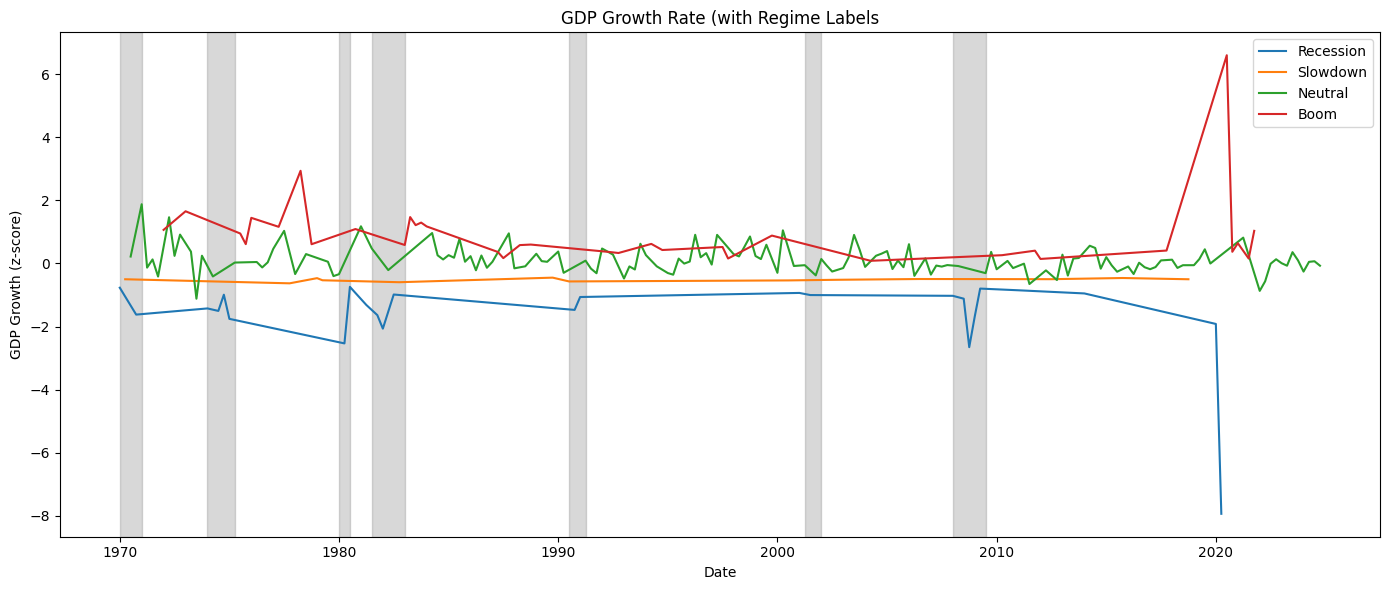

In [215]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure datetime format
Prediction_Indicators_df['observation_date'] = pd.to_datetime(Prediction_Indicators_df['observation_date'])

# Sort by date
df = Prediction_Indicators_df.sort_values('observation_date')

# Start the plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='observation_date', y='GDP_Growth_Rate', hue='label_regime')

# Shade recession periods
recession = False
start_date = None

for i in range(len(df)):
    if Correlatation.iloc[i]['USREC'] == 1 and not recession:
        start_date = df.iloc[i]['observation_date']
        recession = True
    elif Correlatation.iloc[i]['USREC'] == 0 and recession:
        end_date = df.iloc[i]['observation_date']
        plt.axvspan(start_date, end_date, color='grey', alpha=0.3)
        recession = False

# Catch if the last period is a recession and didn’t close
if recession:
    plt.axvspan(start_date, df.iloc[-1]['observation_date'], color='grey', alpha=0.3)

plt.title('GDP Growth Rate (with Regime Labels')
plt.xlabel('Date')
plt.ylabel('GDP Growth (z-score)')
plt.legend()
plt.tight_layout()
plt.show()



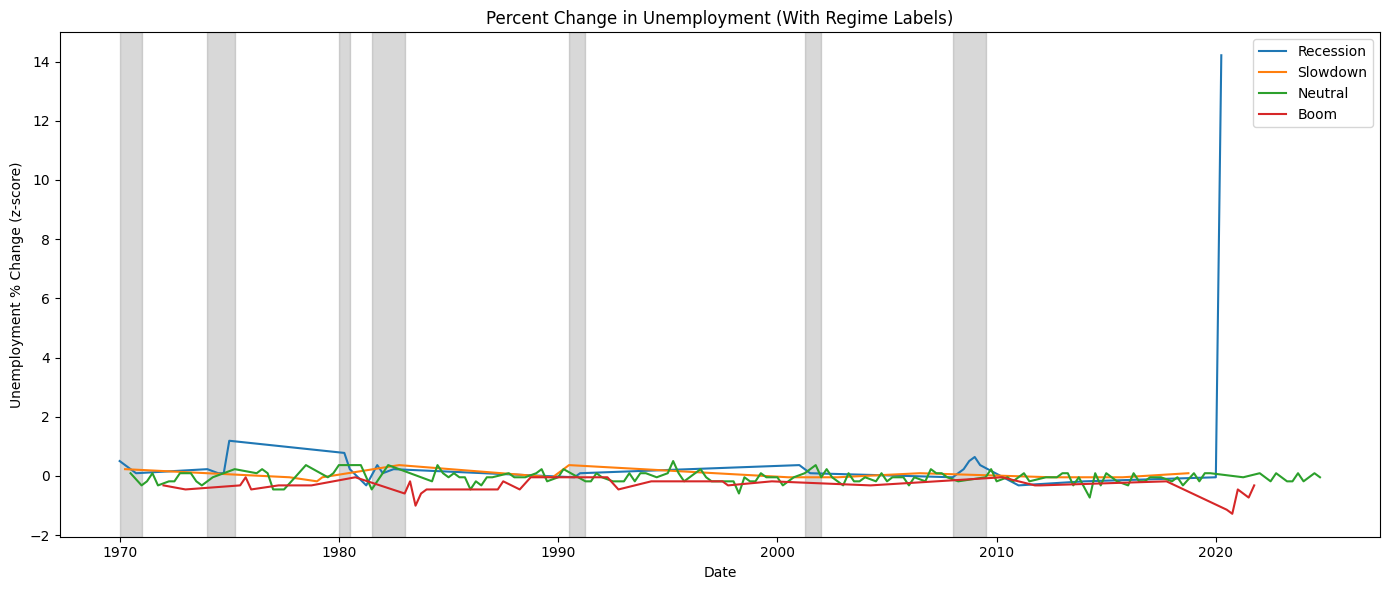

In [216]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure datetime format
Prediction_Indicators_df['observation_date'] = pd.to_datetime(Prediction_Indicators_df['observation_date'])

# Sort by date
df = Prediction_Indicators_df.sort_values('observation_date')

# Start the plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='observation_date', y='Unemployment_Rate_Change', hue='label_regime')

# Shade recession periods
recession = False
start_date = None

for i in range(len(df)):
    if Correlatation.iloc[i]['USREC'] == 1 and not recession:
        start_date = df.iloc[i]['observation_date']
        recession = True
    elif Correlatation.iloc[i]['USREC'] == 0 and recession:
        end_date = df.iloc[i]['observation_date']
        plt.axvspan(start_date, end_date, color='grey', alpha=0.3)
        recession = False

# Catch if the last period is a recession and didn’t close
if recession:
    plt.axvspan(start_date, df.iloc[-1]['observation_date'], color='grey', alpha=0.3)

plt.title('Percent Change in Unemployment (With Regime Labels)')
plt.xlabel('Date')
plt.ylabel('Unemployment % Change (z-score)')
plt.legend()
plt.tight_layout()
plt.show()


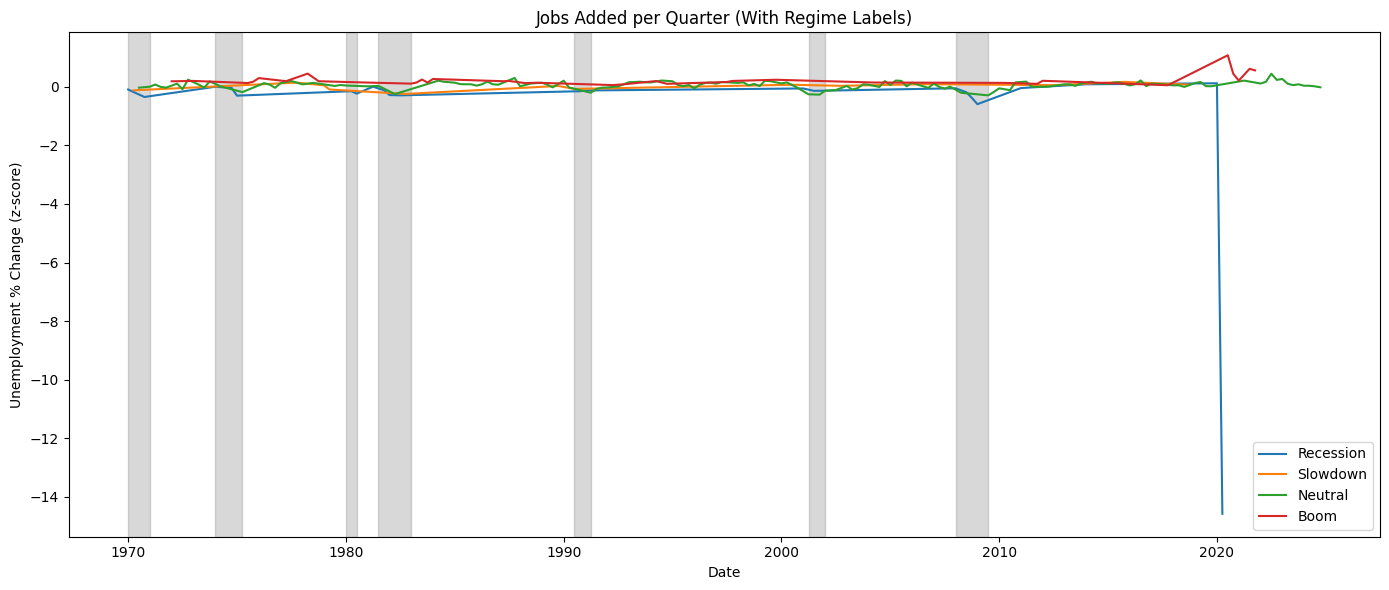

In [217]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure datetime format
Prediction_Indicators_df['observation_date'] = pd.to_datetime(Prediction_Indicators_df['observation_date'])

# Sort by date
df = Prediction_Indicators_df.sort_values('observation_date')

# Start the plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='observation_date', y='Jobs_Added', hue='label_regime')

# Shade recession periods
recession = False
start_date = None

for i in range(len(df)):
    if Correlatation.iloc[i]['USREC'] == 1 and not recession:
        start_date = df.iloc[i]['observation_date']
        recession = True
    elif Correlatation.iloc[i]['USREC'] == 0 and recession:
        end_date = df.iloc[i]['observation_date']
        plt.axvspan(start_date, end_date, color='grey', alpha=0.3)
        recession = False

# Catch if the last period is a recession and didn’t close
if recession:
    plt.axvspan(start_date, df.iloc[-1]['observation_date'], color='grey', alpha=0.3)

plt.title('Jobs Added per Quarter (With Regime Labels)')
plt.xlabel('Date')
plt.ylabel('Unemployment % Change (z-score)')
plt.legend()
plt.tight_layout()
plt.show()

<Axes: xlabel='PC1', ylabel='PC2'>

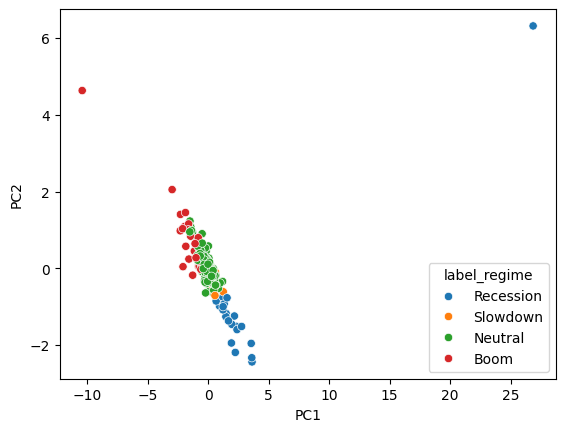

In [218]:
from sklearn.decomposition import PCA

X = Prediction_Indicators_df[features]
pca = PCA(n_components=2)
Prediction_Indicators_df[['PC1', 'PC2']] = pca.fit_transform(X)

sns.scatterplot(data=Prediction_Indicators_df, x='PC1', y='PC2', hue='label_regime')


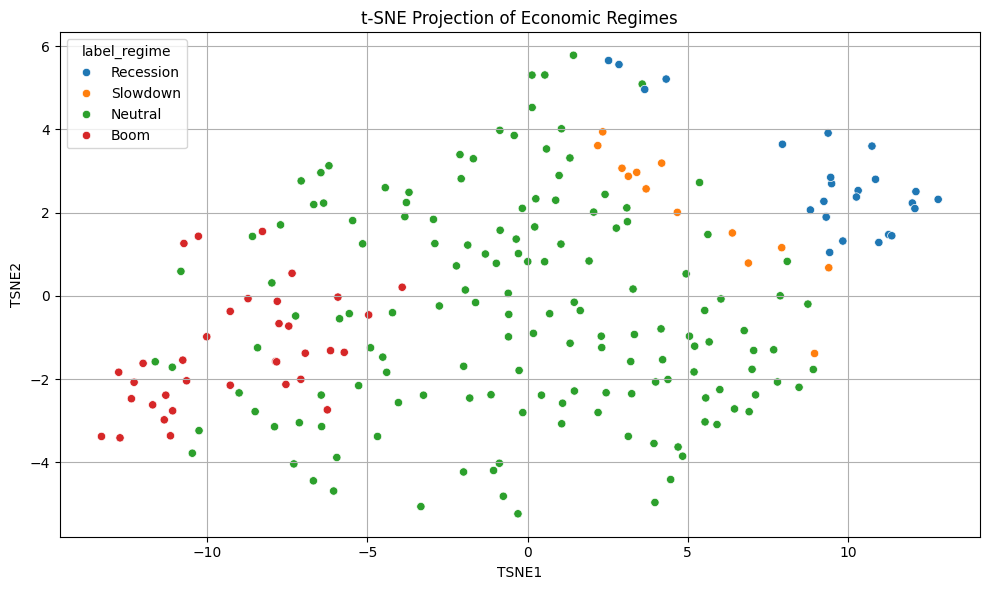

In [219]:
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

# Select features for t-SNE
X = Prediction_Indicators_df[features]

# Run t-SNE
tsne = TSNE(n_components= 2, random_state=42, perplexity=44, learning_rate=3)
tsne_results = tsne.fit_transform(X)

# Add t-SNE results to DataFrame
Prediction_Indicators_df['TSNE1'] = tsne_results[:, 0]
Prediction_Indicators_df['TSNE2'] = tsne_results[:, 1]

# Plot with seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=Prediction_Indicators_df,
    x='TSNE1',
    y='TSNE2',
    hue='label_regime',  # Make sure you're using the correct column name
    palette='tab10'
)
plt.title('t-SNE Projection of Economic Regimes')
plt.grid(True)
plt.tight_layout()
plt.show()


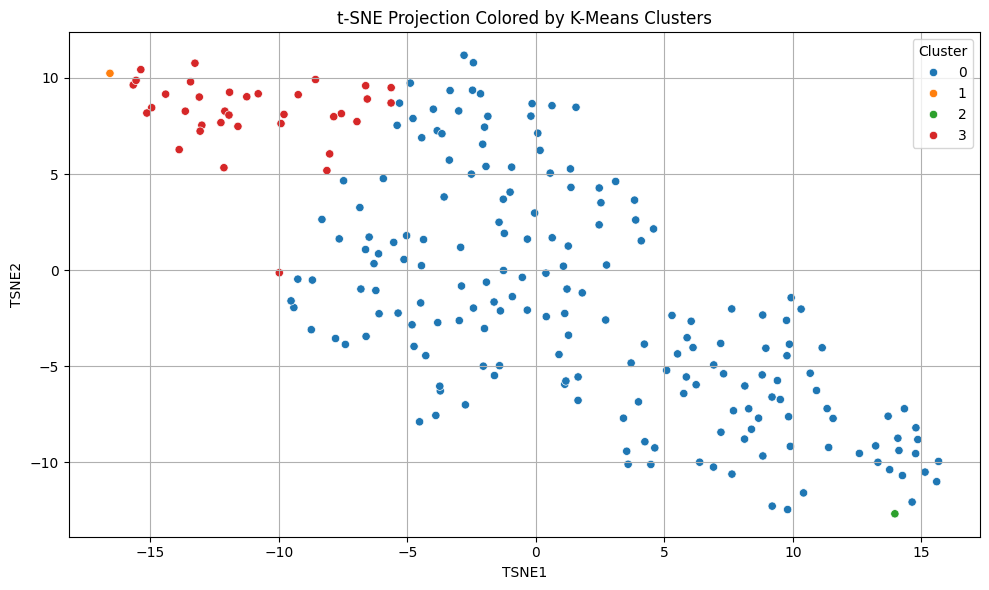

In [220]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Extract features
X = Prediction_Indicators_df[features]

# Step 2: Normalize if not already normalized
# (Skip if you've already done this)
# from sklearn.preprocessing import StandardScaler
# X = StandardScaler().fit_transform(X)

# Step 3: Run K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
Prediction_Indicators_df['Cluster'] = kmeans.fit_predict(X)

# Step 4: t-SNE projection for visualization
tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200)
tsne_results = tsne.fit_transform(X)
Prediction_Indicators_df['TSNE1'] = tsne_results[:, 0]
Prediction_Indicators_df['TSNE2'] = tsne_results[:, 1]

# Step 5: Plot clusters in t-SNE space
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=Prediction_Indicators_df,
    x='TSNE1',
    y='TSNE2',
    hue='Cluster',
    palette='tab10',
    legend='full'
)
plt.title('t-SNE Projection Colored by K-Means Clusters')
plt.grid(True)
plt.tight_layout()
plt.show()


### 📊 **Cluster Centroids (Z-Score Normalized Values)**

| Regime Label | GDP Growth | Unemployment Δ | Jobs Added | Capacity Growth | IP Growth | Claims Δ |
|--------------|------------|----------------|------------|------------------|-----------|-----------|
| **Neutral**  | +0.193     | -0.107         | +0.099     | +0.264           | +0.188    | -0.061    |
| **Recession**| -7.936     | +14.213        | -14.582    | -6.849           | -11.374   | +10.388   |
| **Boom**     | +6.598     | -1.140         | +1.081     | +4.626           | +3.029    | -9.403    |
| **Slowdown** | -0.972     | +0.187         | -0.132     | -1.315           | -0.747    | +0.289    |

---

## EDA+Feature Engineeing